# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'], how='left')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Checking the number of mice.
# assuming this is done by counting distinct IDs instead of by the total of index
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = std_stats / (clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count() ** 0.5)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_stats,
    'Median Tumor Volume': median_stats,
    'Tumor Volume Variance': var_stats,
    'Tumor Volume Std. Dev.': std_stats,
    'Tumor Volume Srd. Err.': sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Srd. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

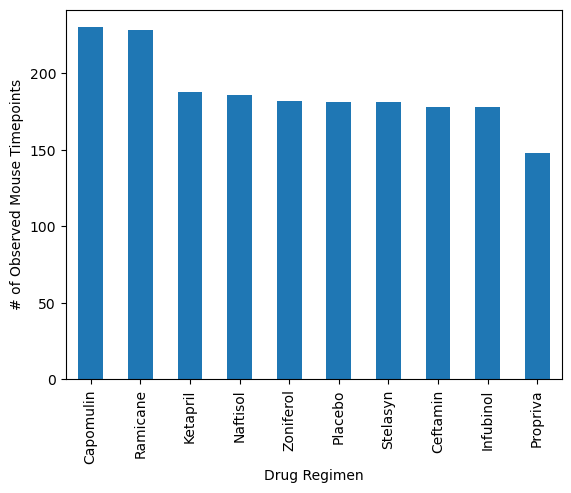

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_timepoint_counts = timepoint_counts.sort_values(ascending=False)
sorted_timepoint_counts.plot(kind='bar', rot=90, ylabel='# of Observed Mouse Timepoints')
plt.show()

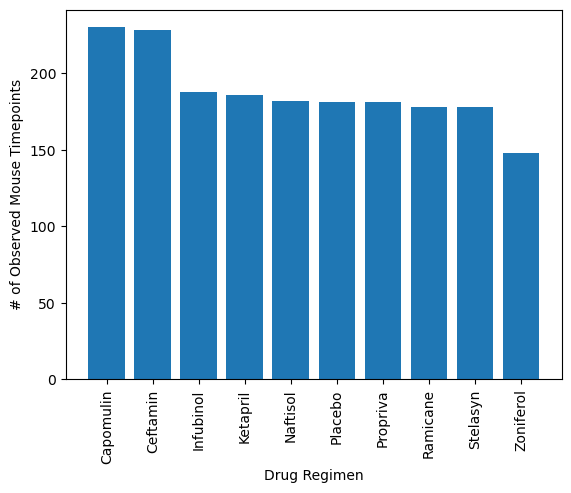

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_count_per_drug = clean_df.groupby('Drug Regimen')['Timepoint'].count()
timepoint_count_sorted = timepoint_count_per_drug.sort_values(ascending=False)
plt.bar(timepoint_count_per_drug.index, timepoint_count_sorted.values)

# formatting for bar chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

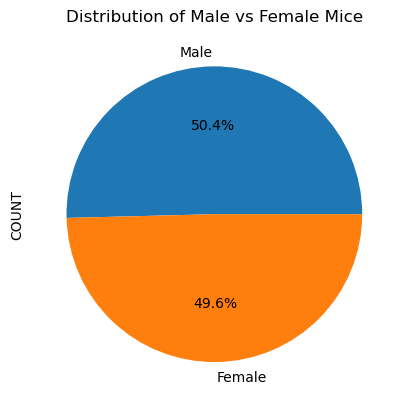

In [85]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_of_mice = clean_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
# Get the unique mice with their gender
sex_counts = sex_of_mice['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='COUNT')
# Make the pie chart
plt.show()

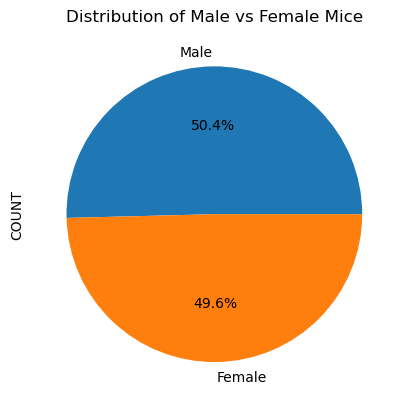

In [87]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_of_mice = clean_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
# Get the unique mice with their gender
sex_counts = sex_of_mice['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.ylabel('COUNT')
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
merged_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumor_volumes)

    # IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Fishing for outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

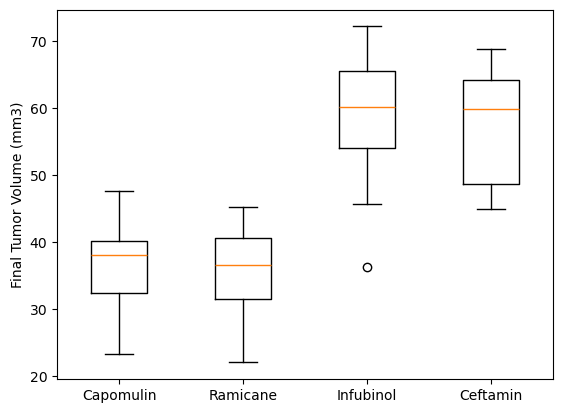

In [94]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

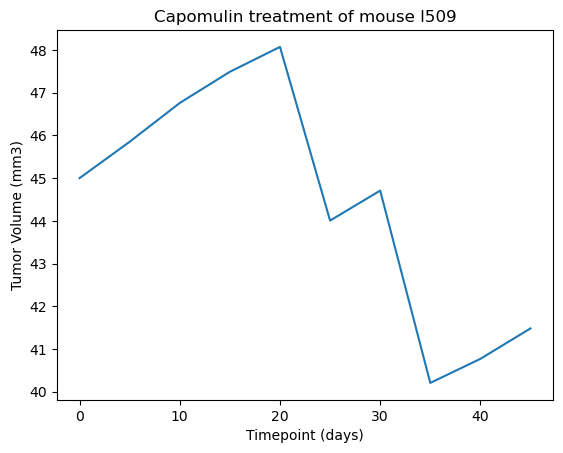

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Selected the same one as given in the example but can be replaced
mouse_id = 'l509' # Any ID can be entered
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
# Plot creation
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Formatting (Labels and title)
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

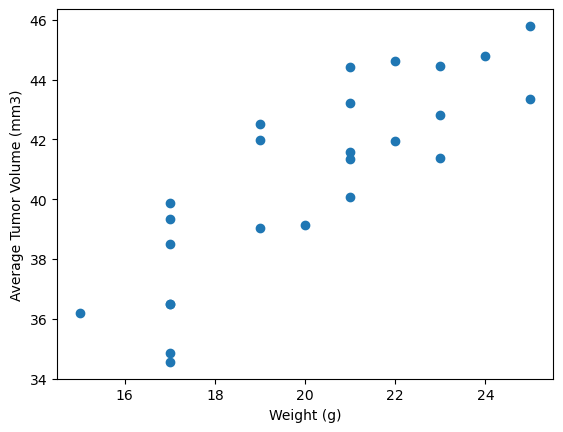

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by mouse ID, get average tumor, keep unique mice, and merge
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(mouse_weight, avg_tumor_volume, on='Mouse ID')

# Create and format the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


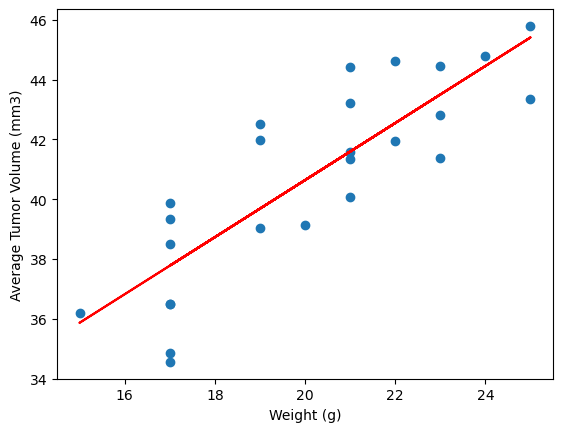

In [174]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = merged_data['Weight (g)']
y_values = merged_data['Tumor Volume (mm3)']
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

# Create scatter plot with linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add formatting (labels and title)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()